<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

План работы:

    Загрузите и подготовьте данные. Поясните порядок действий.
    Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
    Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
    Проведите финальное тестирование.

Описание данных
Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»). Скачать датасет
Признаки

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента

## Подготовка данных

**1.1. Импортировать библиотеки.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split
# импорт библиотеки 'Дерево решений'
from sklearn.tree import DecisionTreeClassifier 
# импорт библиотеки 'Случайный лес'
from sklearn.ensemble import RandomForestClassifier 
# импорт библиотеки 'Логистическая регрессия'
from sklearn.linear_model import LogisticRegression 
# импорт метрики 'accuracy' (точность)
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
#матрица ошибок
from sklearn.metrics import confusion_matrix
#полнота
from sklearn.metrics import recall_score
#точность
from sklearn.metrics import precision_score
#F-1 мера
from sklearn.metrics import f1_score
#AUC-ROC
from sklearn.metrics import roc_auc_score
#ROC-кривая
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle

**1.2. Считать данные из csv-файла в датафрейм и сохранить в переменную `df`**

In [2]:
# прочитаем csv-файл
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

**1.3 Изучить общую информацию о полученном датафрейме.**

In [3]:
# Вывод основной информации о датафрейме с помощью метода info()
df.head(20) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
# Вывод основной информации о датафрейме с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Для дальнейшей работы с датафреймом и обучением моделей можно исключить следующие столбцы:
- RowNumber — индекс строки в данных, дублирует индекс датафрейма
- CustomerId — уникальный идентификатор клиента, не несет информации необходимой для машинного обучения
- Surname — фамилия, не несет информации необходимой для машинного обучения

In [6]:
data = df.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)

In [7]:
#Найдем количество пропущенных значений в столбце 'Tenure'
data['Tenure'].isna().sum() #определим кол-во пропусков метом isna() и sum()

909

In [8]:
# Обработаем пустые значение и заполним 0
data['Tenure'] = data['Tenure'].fillna(0)

**1.4 Разделим на признаки и целевой признак.**

In [9]:
features = data.drop(['Exited'], axis=1)
target = data['Exited']

**1.5. Разделим исходные данные на обучающую (60%), валидационную (20%) и тестовую (20%) выборки.**

1.5.1 Произведём двухэтапое деление. 
Первый этап -  деление на двухкомпонентную выборку:  обучающая (60%) и валидационная + тестовая (40%).
Второй этап  - деление на двухкомпонентную выборку уже разделенной  валидационной + тестовой выборки: валидационная (80%) и тестовая (20%).
Итого получилось 3 выборки: обучающая (60%), валидационная (20%) и тестовая (20%).

In [10]:
# обучающая и валидационная + тестовая выборки, 60% и 40%
# аргумент stratify чтобы сохранить изначальное распределение таргетов во всех новых датасетах
features_train, features_val_test, target_train, target_val_test = train_test_split(features, 
                                                                          target,
                                                                          train_size=0.6, 
                                                                          random_state=12345, 
                                                                          stratify=target)
# валидационная и тестовая выборки, 20% и 20%
features_valid, features_test, target_valid, target_test = train_test_split(features_val_test,
                                                                            target_val_test, 
                                                                            test_size=0.5, 
                                                                            random_state=12345, 
                                                                            stratify=target_val_test)

In [11]:
# Проверим корректность разбиения.
features_train.shape, target_train.shape, features_valid.shape, target_valid.shape, features_test.shape, target_test.shape

((6000, 10), (6000,), (2000, 10), (2000,), (2000, 10), (2000,))

**1.6 Проеобразуем категориальные признаки в численные**

In [12]:
# Проеобразуем категориальные признаки в численные техникой прямого кодирования OHE
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [13]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,549,49,6.0,124829.16,1,0,1,93551.36,1,0,0
9925,694,38,0.0,195926.39,1,1,1,85522.84,0,0,0
8746,660,34,8.0,106486.66,2,0,1,182262.66,0,0,1
660,632,41,0.0,81877.38,1,1,1,33642.21,1,0,0
3610,580,56,1.0,131368.30,1,1,0,106918.67,0,0,0


Для признака Geography создали 3 новых признака или дамми-переменные Geography_France, Geography_Germany, Geography_Spain.
Для признака Gender создали 2 новые дамми-переменные Gender_Female, Gender_Male.
В таблицу добавились три новых столбца признака Geography и два новых столбца признака Gender. Поскольку они сильно связаны между собой, один столбец для каждого признака удалим. Восстановить столбец можно по оставшимся двум. Так мы не попадём в дамми-ловушку. Столбец уберём вызовом функции pd.get_dummies() с аргументом drop_first (от англ. «сбросьте первый»). Он удаляет первую колонку и передаётся как drop_first=True или drop_first=False (True — первый столбец сбрасывается, False — не сбрасывается).

**Вывод.** 

Датафрейм проверен на дубликаты. 

Исключены столбцы RowNumber — индекс строки в данных, CustomerId — уникальный идентификатор клиента, Surname — фамилия.

Пустые значения столба Tenure (сколько лет человек является клиентом банка) заменены на 0, нет возможности сделать вывод является ли человек клиентом банка, поэтому примем всех клиентов с пустыми значениями Tenure за новых клиентов.

Преобразовали категориальные признаки в численные техникой прямого кодирования OHE.

Перед нами задача бинарной классификации. Качественный целевой признак Exited — факт ухода клиента (1 - уйдет, 0 - останется).

## Исследование задачи

**2.1 Проверка сбалансированности**

In [14]:
data['Exited'].value_counts(normalize = 1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Датасет имеет выраженный дисбаланс (80% ответов целевого признака нулевые, 20% единица).
Дисбаланс может повлиять на переобучение модели. Модель с высокой точностью будет выдавать 0 на выборке с выраженным дисбалансом. Выходит, что мы обучили модель отлично работать с 0, но в случае тестовой выборке, да при том и сбалансированной - точность будет низкая, модель будет сильно склоняться к одному из вариантов ответа (часто встречающемуся). 

In [15]:
# выполним масштабирование признаков методом стандартизации данных
# численные признаки для масштабирования 'Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts'
numeric = ['Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts']
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# масштабируем численные признаки на обучающей, валидационной и тестовой выборке
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.shape

(6000, 11)

**2.2. Исследуем качество разных моделей: решающее дерево, случайный лес, логистическая регрессия.**

2.2.1 Эксперимент с решающим деревом. Глубина дерева от 1 до 5.

In [16]:
# цикл для max_depth от 1 до 5
for depth in range(1, 20):
    model_DecisionTree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DecisionTree.fit(features_train, target_train)
    predictions_valid = model_DecisionTree.predict(features_valid)
    predictions_train = model_DecisionTree.predict(features_train)
    print("Глубина", depth, end=' ')
    print(accuracy_score(target_valid, predictions_valid)) 

Глубина 1 0.796
Глубина 2 0.835
Глубина 3 0.84
Глубина 4 0.849
Глубина 5 0.8575
Глубина 6 0.86
Глубина 7 0.859
Глубина 8 0.858
Глубина 9 0.85
Глубина 10 0.8375
Глубина 11 0.835
Глубина 12 0.8255
Глубина 13 0.8175
Глубина 14 0.801
Глубина 15 0.8005
Глубина 16 0.8055
Глубина 17 0.798
Глубина 18 0.7935
Глубина 19 0.7965


Проанализируем частоты классов в результатах предсказаний решающего дерева (переменная predicted_valid).

0    0.7845
1    0.2155
dtype: float64


<AxesSubplot:>

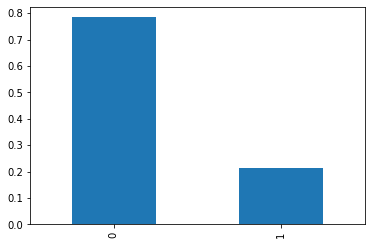

In [17]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_DecisionTree.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [18]:
# Представим результаты вычислений метрик точности и полноты для Решающего дерева с помощью матрица ошибок.
confusion_matrix(target_valid, predicted_valid)

array([[1377,  215],
       [ 192,  216]])

Дерево решений преимущественно выдает негативные нулевые предсказания (TN), что соответствует частоте нулевого класса.

Матрица ошибок поможет построить новые метрики: полноту (Recall), точность (Precision) и F1-мера.
Полнота выявляет, какую долю положительных среди всех ответов выделила модель.
Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. 
Иными словами, полнота и точность оценивают качество прогноза положительного класса с разных позиций. Recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. Precision выявляет, не переусердствует ли модель, присваивая положительные метки. 
F1-мера - агрегирующая метрика, среднее гармоническое полноты и точности.

In [19]:
# Найдем полноту
print("Полнота" , recall_score(target_valid, predictions_valid))
# Найдем точность 
print("Точность", precision_score(target_valid, predictions_valid))
# Найдем F1-меру
print("F1-мера", f1_score(target_valid, predictions_valid))

Полнота 0.5294117647058824
Точность 0.5011600928074246
F1-мера 0.5148986889153755


In [20]:
# посчитаем площадь под ROC-кривой — AUC-ROC, чтобы выявить, как сильно наша модель отличается от случайной
probabilities_valid = model_DecisionTree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.6988311656320819

2.2.2 Эксперимент со случайным лесом. Проверим модель с глубиной от 1 до 20. Покажем лучший результат.

In [21]:
for i in tqdm(range(20)):
    model_RandomForest = None
    best_result = 0
    best_est = 0
    best_depth = 0
    for est in range(1, 21):
        for depth in range (1, 11):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # инициализировать модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
            model.fit(features_train, target_train) # обучить модель на тренировочной выборке
            predictions_valid = model.predict(features_valid) # получить предсказания модели на валидационной выборке
            result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке

        if result > best_result:
            model_RandomForest = model # сохраните наилучшую модель
            best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_est = est
            best_depth = depth

"Accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth

100%|██████████| 20/20 [03:39<00:00, 10.97s/it]


('Accuracy наилучшей модели на валидационной выборке:',
 0.871,
 'Количество деревьев:',
 8,
 'Максимальная глубина:',
 10)

Проанализируем частоты классов в результатах предсказаний случайного леса (переменная predicted_valid).

0    0.872
1    0.128
dtype: float64


<AxesSubplot:>

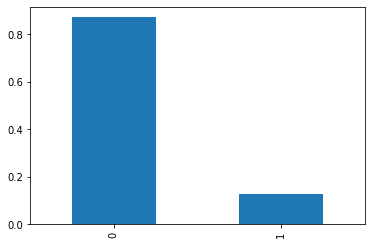

In [22]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_RandomForest.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [23]:
# Представим результаты вычислений метрик точности и полноты для Решающего дерева с помощью матрица ошибок.
confusion_matrix(target_valid, predicted_valid)

array([[1539,   53],
       [ 205,  203]])

Случайный лес преимущественно выдает негативные нулевые предсказания (TN) при выраженном минимальном количестве ошибочных позитивных ответов, что соответствует частоте нулевого класса.

In [24]:
# Найдем полноту
print("Полнота" , recall_score(target_valid, predictions_valid))
# Найдем точность 
print("Точность", precision_score(target_valid, predictions_valid))
# Найдем F1-меру
print("F1-мера", f1_score(target_valid, predictions_valid))

Полнота 0.49019607843137253
Точность 0.78125
F1-мера 0.6024096385542168


In [25]:
# посчитаем площадь под ROC-кривой — AUC-ROC, чтобы выявить, как сильно наша модель отличается от случайной
probabilities_valid = model_RandomForest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.856356691545965

2.2.3 Эксперимент с логистической регрессией

In [26]:
model_LogisticRegression = LogisticRegression(solver='liblinear', random_state=12345) 
model_LogisticRegression.fit(features_valid, target_valid)
predicted_valid = model_LogisticRegression.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid) # получите предсказания модели
print(accuracy_valid)

0.806


Проанализируем частоты классов в результатах предсказаний логистической регрессии.

0    0.915
1    0.085
dtype: float64


<AxesSubplot:>

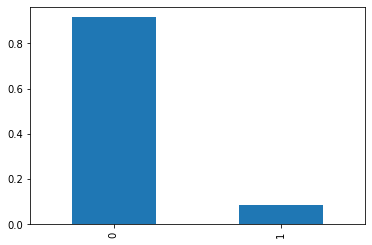

In [27]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_LogisticRegression.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [28]:
# Представим результаты вычислений метрик точности и полноты для Решающего дерева с помощью матрица ошибок.
confusion_matrix(target_valid, predicted_valid)

array([[1517,   75],
       [ 313,   95]])

Логистическая регрессия преимущественно выдает негативные нулевые предсказания (TN) при выраженном минимальном количестве ошибочных позитивных ответов (FP) и минимальном количестве правильных позитивных ответов (TP), что соответствует частоте нулевого класса.

In [29]:
# Найдем полноту
print("Полнота" , recall_score(target_valid, predicted_valid))
# Найдем точность 
print("Точность", precision_score(target_valid, predicted_valid))
# Найдем F1-меру
print("F1-мера", f1_score(target_valid, predicted_valid))

Полнота 0.23284313725490197
Точность 0.5588235294117647
F1-мера 0.328719723183391


In [30]:
# посчитаем площадь под ROC-кривой — AUC-ROC, чтобы выявить, как сильно наша модель отличается от случайной
probabilities_valid = model_LogisticRegression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7968950142871218

**2.3. Проверка адекватности модели. Создадим константную модель: любому объекту она прогнозирует класс «0».**

In [31]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
target_pred_constant = pd.Series(0 for i in range(target.shape[0]))
print(accuracy_score(target, target_pred_constant)) 

0.7963


Все алгоритмы прошли проверку на адекватность.
Алгоритм логистической регрессии выдает достаточно высокую точность, но самое низкое качество модели (F1 - 0.328).

**Вывод.** 

Датасет имеет выраженный дисбаланс (80% ответов целевого признака нулевые, 20% единица), что повлияет на точность модели.

В данных есть численные признаки для масштабирования 'Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts'. Значения и их разбросы в столбцах могут отличаться, поэтому алгоритм автоматически решит, что этот признак важнее. А это не так: все признаки значимы. Чтобы избежать этой ловушки, признаки масштабируют — приводят к одному масштабу.

Исследуя качество разных моделей: решающее дерево, случайный лес, логистическая регрессия выяснили, что самую высокую точность показал Случайный лес.

F1-мера у всех моделей имеет невысокое значение, что говорит о низком качестве модели.
Проблема в дисбалансе, требуется его устранить.

## Борьба с дисбалансом

**3.1. Сбалансируем классы с помощью взвешивания.**

In [32]:
# вычислим F1-мера на сбалансированной выборке дерева решений
model_DecisionTree = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model_DecisionTree.fit(features_train, target_train)
predictions_valid = model_DecisionTree.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.575925925925926


Проанализируем частоты классов в результатах предсказаний решающего дерева.

0    0.664
1    0.336
dtype: float64


<AxesSubplot:>

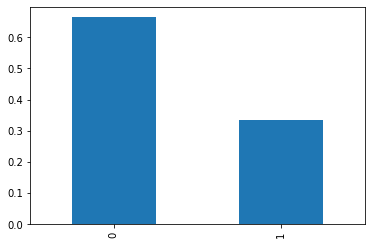

In [33]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_DecisionTree.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [34]:
# вычислим F1-мера на сбалансированной выборке случайного леса
model_RandomForest = RandomForestClassifier(random_state=12345, n_estimators=8, max_depth=10, class_weight='balanced')
model_RandomForest.fit(features_train, target_train)
predictions_valid = model_RandomForest.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.6054827175208581


Проанализируем частоты классов в результатах предсказаний случайного леса.

0    0.7845
1    0.2155
dtype: float64


<AxesSubplot:>

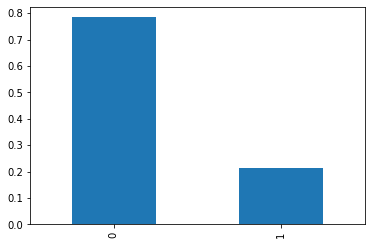

In [35]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_RandomForest.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [36]:
# вычислим F1-мера на сбалансированной выборке логистической регрессии
model_LogisticRegression = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_LogisticRegression.fit(features_train, target_train)
predictions_valid = model_LogisticRegression.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.5302897278314311


Проанализируем частоты классов в результатах предсказаний логистической регрессии.

0    0.6345
1    0.3655
dtype: float64


<AxesSubplot:>

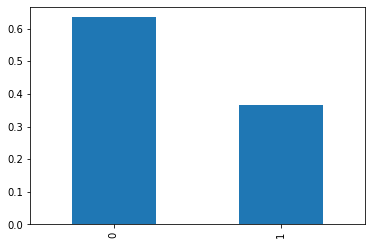

In [37]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_LogisticRegression.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

**3.2. Сбалансируем классы с помощью увеличения выборки.**

В датасете дисбаланс орицательных и положительных классов 1/4.
Необходмо увеличить количество положительных ответов в 4 раза для достижения баланса.
Преобразование проходит в несколько этапов:
- Разделить обучающую выборку на отрицательные и положительные объекты;
- Скопировать несколько раз положительные объекты;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [38]:
# функция увеличения кол-ва положительных объектов
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
# cоединиv таблицы функцией pd.concat()
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
# преобразуем признаки техникой upsampling    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
# повторим кол-во преобразований 4 раза
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [39]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(9666, 11)
(9666,)


In [40]:
# вычислим F1-мера на сбалансированной выборке дерева решений
model_DecisionTree = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_DecisionTree.fit(features_upsampled, target_upsampled)
predictions_valid = model_DecisionTree.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.575925925925926


1    0.517691
0    0.482309
dtype: float64


<AxesSubplot:>

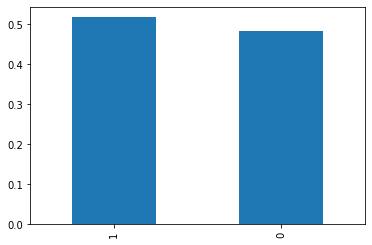

In [41]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_DecisionTree.predict(features_upsampled))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [42]:
# вычислим F1-мера на сбалансированной выборке случайного леса
model_RandomForest = RandomForestClassifier(random_state=12345, n_estimators=8, max_depth=10)
model_RandomForest.fit(features_upsampled, target_upsampled)
predictions_valid = model_RandomForest.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.6226012793176972


1    0.505276
0    0.494724
dtype: float64


<AxesSubplot:>

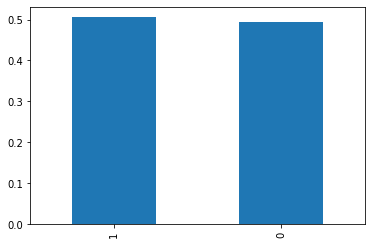

In [43]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_RandomForest.predict(features_upsampled))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [44]:
# вычислим F1-мера на сбалансированной выборке логистической регрессии
model_LogisticRegression = LogisticRegression(random_state=12345, solver='liblinear')
model_LogisticRegression.fit(features_upsampled, target_upsampled)
predictions_valid = model_LogisticRegression.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_valid))

F1: 0.5246753246753246


0    0.507138
1    0.492862
dtype: float64


<AxesSubplot:>

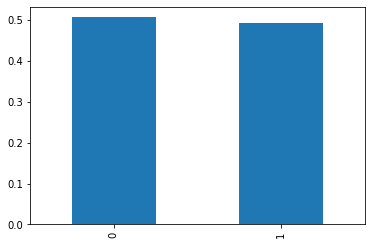

In [45]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_LogisticRegression.predict(features_upsampled))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

**Вывод.** 

Датасет имеет выраженный дисбаланс (80% ответов целевого признака нулевые, 20% единица), что влияет на точность модели.

Протестировал 2 метода борьбы с дисбалансом: взвешивание и увеличение выборки.
Метод увеличения выборки для алгоритма случайного леса дал максимальный прирост меры F1.
Финальное тестирование проведем на данном алгоритме на сбалансированной выборке.

## Тестирование модели

**4.1. Тестирование модели 'Случайный лес' выполним на тестовой выборке.**

Выбор наилучших гиперпараметров модели 'Случайный лес' на сбалансированных (взвешенные + увеличенная выборка) данных.

In [46]:
for i in tqdm(range(20)):
    model_RandomForest_balance = None
    best_f1 = 0
    best_accuracy = 0
    best_est = 0
    best_depth = 0
    for est in range(1, 33):
        for depth in range (1, 11):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') # инициализировать модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
            model.fit(features_upsampled, target_upsampled)
            predictions_valid = model.predict(features_valid) 
            result_accuracy = model.score(features_valid, target_valid)
            result_f1 = f1_score(target_valid, predictions_valid)
            
        if result_f1 > best_f1:
            model_RandomForest_balance = model # сохраните наилучшую модель
            best_f1 = result_f1 #  сохраните наилучшее значение метрики F1
            best_accuracy = result_accuracy #  сохраните наилучшее значение метрики accuracy
            best_est = est
            best_depth = depth

"F1 наилучшей модели:", best_f1, "Accuracy наилучшей модели:", best_accuracy, "Количество деревьев:", best_est, "Максимальная глубина:", depth

100%|██████████| 20/20 [12:24<00:00, 37.20s/it]


('F1 наилучшей модели:',
 0.6491228070175439,
 'Accuracy наилучшей модели:',
 0.84,
 'Количество деревьев:',
 30,
 'Максимальная глубина:',
 10)

Проверка обученной модели 'Случайный леc' на тестовой выборке.

In [49]:
RF_predictions_valid = model_RandomForest_balance.predict(features_test)
result = model_RandomForest.score(features_test, target_test) # посчитайте качество модели на валидационной выборке
print("Accuracy наилучшей модели на тестовой выборке:", result)
print("F1 наилучшей модели на тестовой выборке:", f1_score(target_test, RF_predictions_valid))
print("Полнота наилучшей модели на тестовой выборке:" , recall_score(target_test, RF_predictions_valid))
print("Точность наилучшей модели на тестовой выборке:", precision_score(target_test, RF_predictions_valid))

Accuracy наилучшей модели на тестовой выборке: 0.8025
F1 наилучшей модели на тестовой выборке: 0.5975473801560758
Полнота наилучшей модели на тестовой выборке: 0.6584766584766585
Точность наилучшей модели на тестовой выборке: 0.5469387755102041


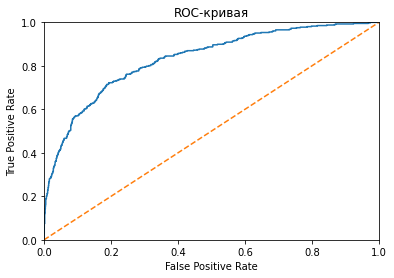

AUC-ROC наилучшей модели на тестовой выборке: 0.8322020016935271


In [50]:
probabilities_valid = model_RandomForest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print("AUC-ROC наилучшей модели на тестовой выборке:", auc_roc)

**Результаты проделанной работы.** 
- Выполнена подготовка данных. Исключены столбцы которые не влияют на обучение моделей, заполнены пустые значения.
- Преобразованы категориальные признаки в численные с помощью масштабирования.
- Исследован баланс классов. Первоначальный датасет имел выраженный дисбаланс (80% ответов целевого признака нулевые, 20% единица).
- Выполнено исследование качества разных моделей без учёта дисбаланса: решающее дерево, случайный лес, логистическая регрессии. F1-мера у всех моделей имеет невысокое значение, что говорит о низком качестве модели.
- Выполнена проверка на адекватность. Алгоритм логистической регрессии не прошел проверку на адекватность.
- Улучшение моделей выполнено двумя методами борьбы с дисбалансом: взвешивание и увеличение выборки.
- Лучший результат показала модель 'Случайный лес' (RandomForestClassifier).

**Вывод.**
В результате проверки обученной модели на тестовой выборке получили следующие результаты:
- Удалось достичь метрики F1-меры более 0.59.
- AUC-ROC 0.83, что больше AUC-ROC значения случайной модели 0.5.
- Полнота (recall) 0.65, что говорит о высокой вероятности ухода клиентов.
- Точность (precision) 0.54, что говорит о не высокой точности модели, вероятность ухода клиента банка 50/50.